In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

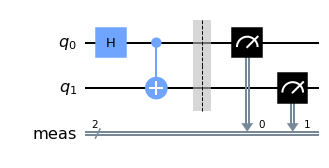

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

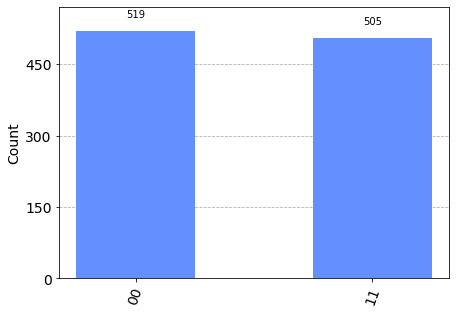

In [3]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [4]:
from qiskit import IBMQ

IBMQ.load_account()

IBMQ.providers()

C:\Users\Mateusz Slysz\AppData\Local\Temp\ipykernel_15844\2707590488.py:3: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\Mateusz Slysz\AppData\Local\Temp\ipykernel_15844\2707590488.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-psnc', group='internal', project='default')>,
 <AccountProvider for IBMQ(hub='ibm-q-psnc', group='internal', project='reservations')>]

In [5]:
provider = IBMQ.get_provider(hub='ibm-q-psnc', group='internal', project='reservations')
provider.backends()

[<IBMQBackend('ibmq_kolkata') from IBMQ(hub='ibm-q-psnc', group='internal', project='reservations')>]

In [6]:
backend = provider.get_backend('ibmq_kolkata')
print(backend)

ibmq_kolkata


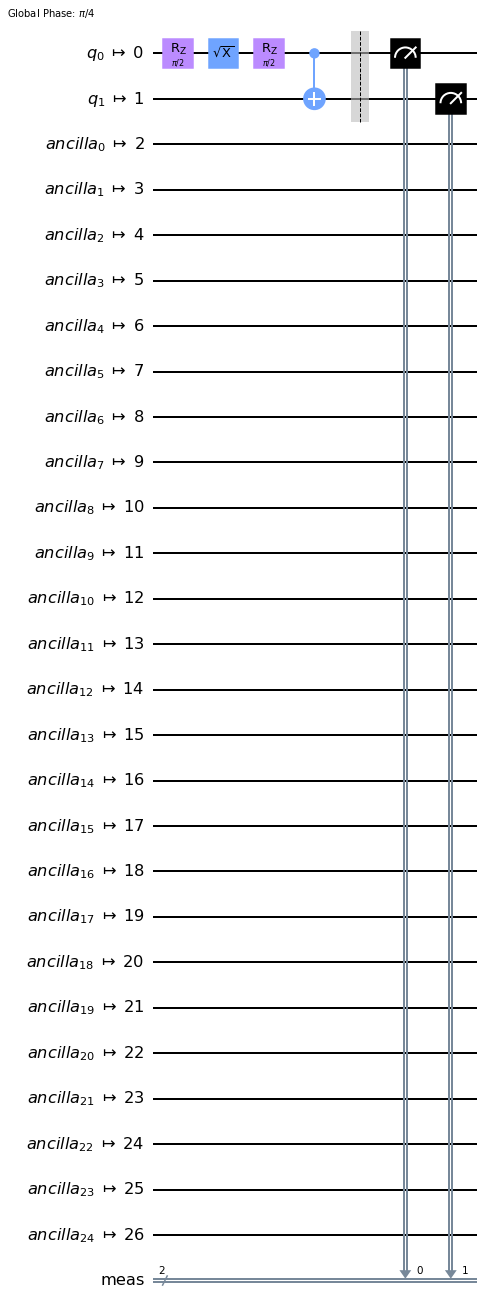

In [12]:
from qiskit import transpile
trans = transpile(qc, backend)
trans.draw('mpl')

In [13]:
backend_job = backend.run(trans)
backend_counts = backend_job.result().get_counts()

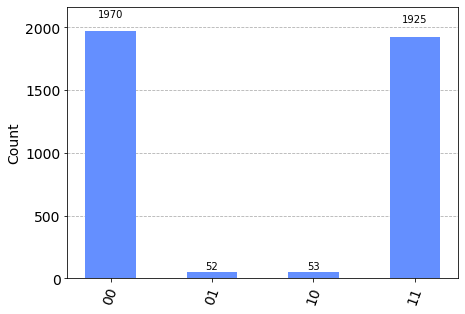

In [14]:
plot_histogram(backend_counts)